## Compute Global Relative Atmospheric Angular Momentum From CFS Reanalysis Data
###### Inputs: 0.5 deg lat/lon grid data obtained from CFS Reanalysis (CFSR)				
###### Outputs: Global Relative Atmospheric Angular Momentum kg*m^2/s (average value is 3 * 10^26 kg*m^2
### Created by: Victor Gensini (Fall 2016)								

In [1]:
import numpy as np
import math, pygrib
import matplotlib.pyplot as plt

In [2]:
pi = math.pi
rad = pi/180.
twopi = 2.*pi
gravity = 9.81
radius_E = 6371220.
radius_E3 = radius_E**3

### Open a CFSR grib2 file

In [3]:
gr = pygrib.open('/home/vgensini/data/CFSR/cfsr_199405.grb2')

### Read in all U-component (i.e., zonal) wind values and select your datetime

In [4]:
umsgs = gr.select(name='U component of wind',typeOfLevel='isobaricInhPa', year=1994,month=5,day=23, hour=0)

In [5]:
lats,lons = umsgs[0].latlons()

In [6]:
uwnd = np.zeros((361, 720, 37))
for i,levs in enumerate(umsgs):
    uwnd[:,:,i] = levs.values

In [7]:
dps=[0.,100.,200.,200.,300.,1000.,1000.,2000.,2000.,3000.,2500.,2500.,2500.,2500.,2500.,2500.,5000.,5000.,5000.,5000.,5000.,5000.,5000.,5000.,5000.,5000.,2500.,2500.,2500.,2500.,2500.,2500.,2500.,2500.,2500.,2500.,0.]
dps = np.tile(np.array(dps),(361,720,1))
UDP = np.multiply(uwnd,dps)
moment = np.mean(UDP, axis=(1,2))
aam = np.multiply(np.multiply(moment,np.cos(lats[:,0]*rad)),twopi*radius_E3/gravity)

In [8]:
print np.sum(aam)

6.54923297697e+26


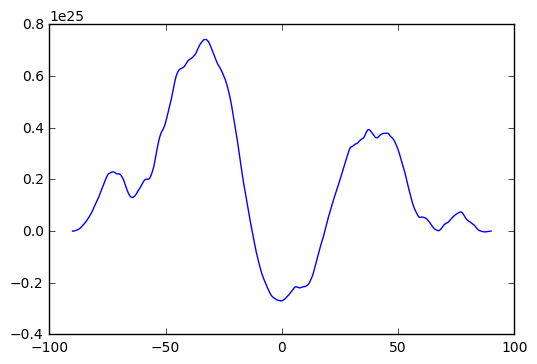

In [9]:
plt.plot(lats[:,0],aam)
plt.show()